In [7]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
import uncertainties
from scipy import optimize
from scipy.optimize import curve_fit
from uncertainties import ufloat as uf
from uncertainties.umath import *
from uncertainties import unumpy as un
from uncertainties.unumpy import nominal_values as n
from uncertainties.unumpy import std_devs as s
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel
from lmfit import Model


####################################################################################################################
#Warnings disabled
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
#####################################################################################################################
def E_kal(x,m,b):
    return m*x+b

# def Effizienz(E,A,B,C,D):
#     return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E

# def uEffizienz(E,A,B,C,D):
#     # return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E
#     return A-B*exp(C*(E+D))

def Gausfit_1(winkel,x,y,namena,amplitude,center,sigma,dont_show):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    # print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    figure=plt.figure(figsize=(10,6))
    plt.title('Gaußkurvenfit an das korrigierte Cs-Streuspektrum bei '+str(winkel)+'$^{\circ}$',fontsize=15)
    plt.plot(x1,y1,"b-",linewidth=.2,label="Messwerte",)
    plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
    plt.xlabel('Energie [keV]',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    plt.legend(fontsize=12)
    plt.savefig(namena+'.png')
    if (dont_show==1):
        plt.close(figure)
    #plt.show
    return lolo1,lala1

def Gausfit_11(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    #print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gausfit_2(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_') +
             GaussianModel(prefix='g2_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma,
                            g2_amplitude=amplitude,
                            g2_center=center,
                            g2_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gradenfit(x,y):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Gradenfiter(x,y,dy):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y,sigma=dy,absolute_sigma=True)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Fit(x,y,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit2(x,y,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth(x,y,x_smooth,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth2(x,y,x_smooth,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def coarseBackgroundModel(x_,y_,deg):
    poly_mod = PolynomialModel(deg, prefix='p1_')
    p_bg = poly_mod.guess(y_, x=x_)
    mod_bg = poly_mod
    init_bg = mod_bg.eval(p_bg, x=x_)
    out_bg = mod_bg.fit(y_, p_bg, x=x_)
    return p_bg, out_bg, mod_bg
#Die beiden Funktionen sind leichte Abänderungen von Teilen eines Skriptes zur Auswertung von Radioteleskop-Spektren, das uns im Rahmen 
#eines Praktikum 4 Versuches gegeben wurde
def getSignal(x,y,width_guess,NPeaks,smoothing,signal_range,signal_thr = None):
    s_mask = (x>signal_range[0])&(x<signal_range[1])
    x_s = x[s_mask]
    signal_use = (y)[s_mask]

    if (smoothing == 1):
        b,a = scs.butter(3,0.07)
        zi = scs.lfilter_zi(b, a)
        z, _ = scs.lfilter(b, a, x_s, zi=zi*signal_use[0])
        z2, _ = scs.lfilter(b, a, z, zi=zi*z[0])
        signal_smooth = scs.filtfilt(b, a, signal_use)
    
    else:
       signal_smooth = signal_use

    amp = (np.max(signal_smooth)-np.min(signal_smooth))
    minimum = np.min(signal_smooth)
    
    s_min = signal_range[0]+50
    s_max = signal_range[1]-50
    
    s_mask_narrow = ((x_s>s_min)&(x_s<s_max))
    
    if signal_thr is None:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], width=width_guess)
        prom = peaks[1]['prominences']
    else:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], height = minimum + signal_thr*amp, width=width_guess)
        prom = peaks[1]['peak_heights']
    prom_save = prom.copy()
    prom.sort()
    
    # only use the most prominent peaks for our first guess of the Gauss peak centers:
    if NPeaks > len(prom): # if not enough peaks are found, reduce NPeaks!
        NPeaks = len(prom)
        print("reduced NPeaks to "+str(NPeaks))
    peaks_use = peaks[0][prom_save>=prom[-NPeaks]] 
    peak_width = peaks[1]['widths'][prom_save>=prom[-NPeaks]]
    # save the peak positions for later
    gauss_centers = x_s[s_mask_narrow][peaks_use]
    peak_y = signal_use[s_mask_narrow][peaks_use]
    return x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth

def detailedSignalFit(x_s, signal_use,add_gaussians, gauss_centers, peak_width, center_variation,sigma_min,sigma_max,amp_min,amp_value_guess,y_err=[],poly_deg = 3):
    mask_edges = np.logical_or(x_s<signal_range[0]+50, x_s>signal_range[1]-50)
    if not (poly_deg is None):
        poly1 = PolynomialModel(degree=poly_deg, prefix='p1_')
        p_s = poly1.guess(signal_use[mask_edges],x=x_s[mask_edges])

    # set up the first Gauss peak
    gaussX = GaussianModel(prefix='g'+str(0)+'_')
    gaussians = gaussX
    p_gauss = gaussX.make_params()
    if (poly_deg is None): p_s = p_gauss 
    p_gauss['g'+str(0)+'_center'].set(value=gauss_centers[0], min=gauss_centers[0]-center_variation, max=gauss_centers[0]+center_variation) # center
    p_gauss['g'+str(0)+'_sigma'].set(value=peak_width[0], min=sigma_min, max=sigma_max) # width of peak
    p_gauss['g'+str(0)+'_amplitude'].set(value=amp_value_guess, min=amp_min) # amplitude of peak

    # now set up the rest of the Gauss peaks:
    for i in np.arange(1,len(gauss_centers)):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params())
        p_gauss['g'+str(i)+'_center'].set(value=gauss_centers[i], min=gauss_centers[i]-center_variation, max=gauss_centers[i]+center_variation)
        p_gauss['g'+str(i)+'_sigma'].set(value=peak_width[i], min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(value=amp_value_guess, min=amp_min)
    
    # add some extra gauss peaks with free parameters to patch up anything left
    for i in np.arange(len(gauss_centers),len(gauss_centers)+add_gaussians):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params()) 
        p_gauss['g'+str(i)+'_center'].set(min=np.min(x_s)+50, max=np.max(x_s)-50)
        p_gauss['g'+str(i)+'_sigma'].set(min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(min=amp_min)
    
    # assemble the model:  polynomial background + Gauss peaks
    if not (poly_deg is None): mod_s = poly1 + gaussians
    else: mod_s = gaussians
    # include parameters for the Gauss peaks in the parameter list
    p_s.update(p_gauss)
    # initialize model with the parameters
    init_s = mod_s.eval(p_s, x=x_s)
    # fit model
    if (len(y_err)>0):
        out_s = mod_s.fit(signal_use, p_s, x=x_s,weights=1.0/y_err,nan_policy='omit')
    else:
        out_s = mod_s.fit(signal_use, p_s, x=x_s)
    return p_s, out_s, mod_s, gaussians

def Fit_allinone(x,y,N,y_err=[],width=10,center_var=20,s_range=[],amp_guess=50,polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1,return_in_lists=None,one_list=None):
    if not s_range:
        s_range=[x[0],x[len(x)-1]]
    s_mask = (x>s_range[0])&(x<s_range[1])
    if (len(y_err)>0):
        y_errs = y_err[s_mask]
    else:
        y_errs=[]
    x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= None)
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, signal_use,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,y_err=y_errs,poly_deg= polydeg)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    i=0
    count=0
    params_list=[list() for x in range(int(len(lolo1)/5))]
    stderr_list=[list() for x in range(int(len(lolo1)/5))]
    centers=[]
    Amplitudes=[]
    centerser=[]
    Amplitudeser=[]
    for h in range(len(lolo1)):
        params_list[i].append(lolo1[h])
        stderr_list[i].append(lala1[h])
        count=count+1
        if (count==5):
            i=i+1
            count=0
    result=out_s.best_fit
    if (return_in_lists is None):
        return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers,peak_y
    elif (one_list is None):
        return_other=[gauss_centers,peak_y,names,p_s,mod_s,mod_s_only]
        return_fit=[x_s,result]
        return_fit_results=[params_list,stderr_list,lolo1,lala1,out_s]
        return return_fit,return_fit_results,return_other
    elif not (one_list is None):
        return_list=[x_s,result,lolo1,lala1,out_s,gauss_centers,peak_y,p_s,mod_s,mod_s_only,names]
        return return_list

def Fit_allinone_wocent(x,y,gauss_centers,peak_width,center_var,s_range,amp_guess,y_err=[],polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1):
    #x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= None)
    s_mask = (x>s_range[0])&(x<s_range[1])
    if (len(y_err)>0):
        y_errs = y_err[s_mask]
    else:
        y_errs=[]
    x_s = x[s_mask]
    y_s = (y)[s_mask]
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, y_s,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,y_err=y_errs,poly_deg= polydeg)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    result=out_s.best_fit
    return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers

def Plotter(X,Y,N_plots,errors=[],figsiz=(12,6),ucband=[],labels=[],colors=[],text=[],linewidths=[],styles=[],markersizes=[],xtitle='x',ytitle='y',title='A',name=None,xrange=None,yrange=None,close=None):
    for n in range(0,N_plots):
        labels.append('')
        colors.append('b')
        linewidths.append(0.5)
        styles.append('-')
        markersizes.append(1)
    figure=plt.figure(figsize=figsiz)
    plt.title(title)
    for i in range(0,N_plots):
        plt.plot(X[i],Y[i],styles[i],color=colors[i],linewidth=linewidths[i],label=labels[i],markersize=markersizes[i])
    if errors:
        plt.errorbar(errors[0],errors[1],errors[3],errors[2],'k.',capsize=1,elinewidth=1,markersize=0,label='Fehler')
    if not (len(ucband)==0):
        plt.fill_between(ucband[0][0], ucband[0][1]-ucband[0][2], ucband[0][1]+ucband[0][2], color="#48BDC6",label=(str(ucband[1][0])+'-$\sigma$ uncertainty band'))
    plt.xlabel(xtitle,fontsize=12)
    plt.ylabel(ytitle,fontsize=12)
    if text:
        for i in range(len(text[0])):
            plt.text( text[1][i],text[2][i], str(np.round(text[0][i],3)), fontsize = 10)
    if xrange:
        plt.xlim(xrange)
    if not (yrange is None):
        plt.ylim(yrange)
    plt.grid()
    plt.legend()
    if not (name is None):
        plt.savefig(name+'.png')
    if not (close is None):
        plt.close(figure)
    plt.show
    return 0

def ripfromlist(mylist,riplist):
    rippedlist=[]
    for i in range(len(mylist)):
        if i not in riplist:
            rippedlist.append(mylist[i])
    return rippedlist

def filetoxy(name):
    data=np.loadtxt(name)
    x=data[:,0]
    y=data[:,1]
    y_err=np.zeros(shape=(len(y)))
    # i=0
    # for h in y:
    #     if (h<=0.0):
    #         y_err[i]=0.1
    #     else:
    #         y_err[i]=np.sqrt(h)
    #     i=i+1
    y_err=np.sqrt(y)
    y2=un.uarray(y,y_err)
    return x,y,y2


signal_range=[0,4500]
path1='../data/'
xEu,yEu,yEuer=filetoxy(path1+'Eu-Ge-10.txt')
xCo,yCo,yCoer=filetoxy(path1+'Co-Ge.txt')
xCs,yCs,yCser=filetoxy(path1+'Cs-Ge.txt')
xBg,yBg,yBger=filetoxy(path1+'Hintergrund-Ge.txt')
# xuBg,yuBg,yuBger=filetoxy(path1+'Untergrund-langzeit.txt')
masklast=((xEu<16300))# & (xEu>10))c


def get_params(out_s,n):
    lala1=[]
    lolo1=[]
    names=[]
    i=0
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    return lolo1,lala1,names

def BackgroundVernichter(x_wpeaks,x_wopeaks,y_wopeaks,N_Bgsplit,Bgoverlap):
    x=x_wpeaks
    x2=x_wopeaks
    y2=y_wopeaks
    BG=[]
    BG2=[]
    para=[]
    para_std=[]
    for i in range(N_Bgsplit):
        mask=((x2>=len(x)*(i/N_Bgsplit-1/(N_Bgsplit*Bgoverlap))) & (x2<len(x)*((i+1)/N_Bgsplit+1/(N_Bgsplit*Bgoverlap))))
        mask2=((x>=len(x)*i/N_Bgsplit) & (x<len(x)*(i+1)/N_Bgsplit))
        mask3=((x2>=len(x)*i/N_Bgsplit) & (x2<len(x)*(i+1)/N_Bgsplit))
        p_bg, out_bg, mod_bg = coarseBackgroundModel(x2[mask],y2[mask],7)  
        background = mod_bg.eval(p_bg,x=x[mask2])
        params,params_stderr,names=get_params(out_bg,-1)
        para=np.concatenate((para,params))
        para_std=np.concatenate((para_std,params_stderr))
        BG=np.concatenate((BG,background))
        background = mod_bg.eval(p_bg,x=x2[mask3])
        BG2=np.concatenate((BG2,background))
    return BG,BG2,para,para_std,names
def Tab(names,data,dataer,filename,separat_runden=[]):
    runden=separat_runden
    with open(filename+'.txt', 'w') as f:
        f.write('{l')
        for h in range(0,len(names)-1):
            f.write('|l')
        f.write('}\n')
        for h in range(0,len(names)):
            if not (h==len(names)-1):
                f.write(names[h]+ '&')
            else:
                f.write(names[h]+ '\\\\')
            runden.append(3)
        f.write('\n')
        f.write('\hline')
        f.write('\n')
        count=0
        for i in range(0,len(data)):
            if not(dataer[i]==0):
                if (np.sign(np.log10(dataer[i]))*int(np.abs(np.log10(dataer[i]))) <=0):
                    f.write(str(np.round(data[i],runden[count]+int(np.abs(np.log10(dataer[i])))))+ '\pm'+str(np.round(dataer[i],runden[count]+int(np.abs(np.log10(dataer[i]))))))
                else:
                    f.write(str(np.round(data[i],runden[count]-int(np.abs(np.log10(dataer[i])))))+ '\pm'+str(np.round(dataer[i],runden[count]-int(np.abs(np.log10(dataer[i]))))))
            else:
                f.write(str(np.round(data[i],runden[count]+int(np.abs(np.log10(data[i]))))))
            if not (count==(len(names)-1)):
                f.write('&')
            else:
                f.write('\\\\')
                f.write('\n')
                count=-1
            count=count+1
        f.close
    return 0

def Tab2(names,data,dataer,filename,separat_runden=[]):
    runden=separat_runden
    with open(filename+'.txt', 'w') as f:
        f.write('{l')
        for h in range(0,len(names)-1):
            f.write('|l')
        f.write('}\n')
        for h in range(0,len(names)):
            if not (h==len(names)-1):
                f.write(names[h]+ '&')
            else:
                f.write(names[h]+ '\\\\')
            runden.append(3)
        f.write('\n')
        f.write('\hline')
        f.write('\n')
        for i in range(0,len(data[0])):
            count=0
            for h in range(len(names)):
                if (len(dataer[h])==0):
                    if (np.sign(np.log10(data[h][i]))*int(np.abs(np.log10(data[h][i]))) <=0):
                        f.write(str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(data[h][i]))))))
                else:
                    if not(dataer[h][i]==0):
                        if (np.sign(np.log10(dataer[h][i]))*int(np.abs(np.log10(dataer[h][i]))) <=0):
                            f.write(str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(dataer[h][i])))))+ '\pm'+str(np.round(dataer[h][i],runden[count]+int(np.abs(np.log10(dataer[h][i]))))))
                        else:
                            f.write(str(np.round(data[h][i],runden[count]-int(np.abs(np.log10(dataer[h][i])))))+ '\pm'+str(np.round(dataer[h][i],runden[count]-int(np.abs(np.log10(dataer[h][i]))))))
                    else:
                        f.write(str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(data[h][i]))))))
                    #f.write(str(np.round(data[h][i],runden[count]))+ '\pm'+str(np.round(dataer[h][i],runden[count])))
                if not (count==(len(names)-1)):
                    f.write('&')
                else:
                    f.write('\\\\')
                    f.write('\n')
                    count=-1
                count=count+1
        f.close
    return 0

def Lmfiter(x,y,s,func,dy=[],dont_plot=None,no_fitreport=None,more_points=[],sigma=1):
    model=Model(func)
    params=model.make_params()
    i=0
    if (len(more_points)==0):
        more_points=np.linspace(x.min(),x.max(),num=1000)
    for name,valu in params.items():
        valu.value=s[i]
        i=i+1
    if (len(dy)==0):
        result=model.fit(y,params,x=x)
        rfit=result.eval(x=more_points)
        dely=0
        dy=np.zeros(shape=(len(y)))
    else:
        result=model.fit(y,params,x=x,weights=1.0/dy,nan_policy='omit')
        rfit=result.eval(x=more_points)
        dely = result.eval_uncertainty(sigma=1,x=more_points)
    if dont_plot is None:
        result.plot()
        plt.show()
    if no_fitreport is None:
        print(result.fit_report(min_correl=0.5))
    params=[[val.value for name,val in result.params.items()],[val.stderr for name,val in result.params.items()],[name for name,val in result.params.items()]]
    plotit=[more_points,rfit,dely]
    return plotit,result,params

def handle0er(uarray):
    mini=min(i for i in s(uarray) if i > 0)
    for i in range(len(s(uarray))):
        if s(uarray[i])==0:
            uarray[i]=uf(n(uarray[i]),mini)
    return uarray
#Plotter([xEu],[(yEu)/600],1,yrange=(0,0.5))
# print(datas)
# data1=np.loadtxt(path1+'spectrum.txt')

#p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc,py=Fit_allinone(x,y,width=20,N=4,center_var=50,s_range=signal_range,amp_guess=5000,polydeg=3,more_gaus=1)

mylist=[3,3,3,0,3,0]
riplist=[3,5]
print(ripfromlist(mylist,riplist))
# data_x=[x,x_s,gc]
# data_y=[y,Rfit,py]
# Plotter(x,y,3,['spektrum','fit',''],['blue','red','lightgreen'],[1,2,10],['-','-','x'],[0,0,10],'kanal','Anzahl','Voraufgabe','voraufgabe')
i=0
if (i==0.0):
    print('yeet')

[3, 3, 3, 3]
yeet


[[Model]]
    Model(expf)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 2054
    # variables        = 3
    chi-square         = 2595.05816
    reduced chi-square = 1.26526483
    Akaike info crit   = 486.265902
    Bayesian info crit = 503.148536
    R-squared          = 0.94442879
[[Variables]]
    a: -0.00228042 +/- 2.3221e-05 (1.02%) (init = -0.00246)
    b:  7325.22200 +/- 824.321991 (11.25%) (init = 17080)
    c: -4.7068e-04 +/- 1.4763e-04 (31.37%) (init = 0.00436)
[[Correlations]] (unreported correlations are < 0.500)
    C(a, b) = -0.9982
[[Model]]
    (Model(polynomial, prefix='p1_') + Model(gaussian, prefix='g0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 9060
    # variables        = 4
    chi-square         = 9988.74888
    reduced chi-square = 1.10299789
    Akaike info crit   = 892.167461
    Bayesian info crit = 920.613959
    R-squared          = 0.

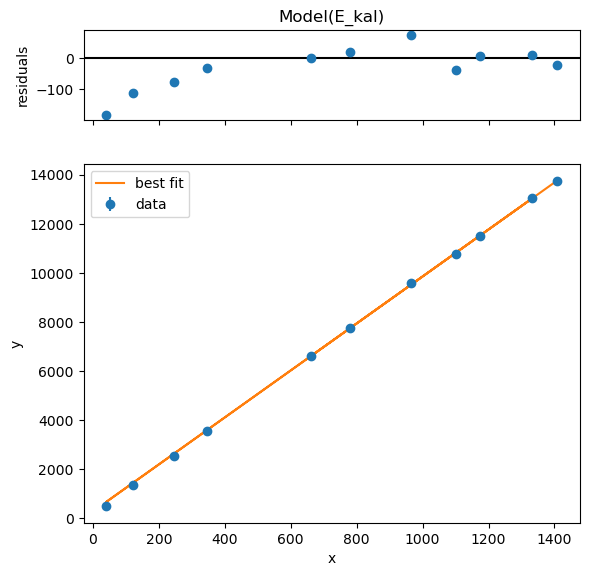

[[Model]]
    Model(E_kal)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 420.355753
    reduced chi-square = 84.0711506
    Akaike info crit   = 32.6663386
    Bayesian info crit = 32.5581589
    R-squared          = 0.99973860
[[Variables]]
    m:  9.56966594 +/- 0.03300017 (0.34%) (init = 9.669315)
    b:  279.213849 +/- 22.9717993 (8.23%) (init = 173.3047)
[[Correlations]] (unreported correlations are < 0.500)
    C(m, b) = -0.9866
Ekal-Gradensteigung: 0.10165874128342371 +/- 7.65259366754713e-06
Ekal-Achsenabschnitt: -9.772194510501164 +/- 0.024325319398549476
Intensität Europium in Bq: 588483.5985495531


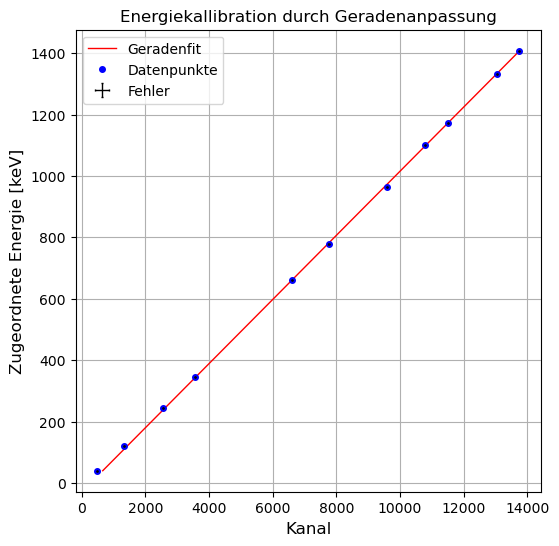

In [8]:
xCoNa,yCoNa1,yerCo=filetoxy(path1+'Co-Na.txt')
xCsNa,yCsNa1,yerCs=filetoxy(path1+'Cs-Na.txt')
xEuNa,yEuNa1,yerEu=filetoxy(path1+'Eu-Na.txt')
Egal,Untergrund,yer=filetoxy(path1+'Hintergrund-Na.txt')

Untergrund1=Untergrund/600
Untergrund1[16383]=0
Plotter([Egal],[Untergrund1],1,colors=['b'],close=1,linewidths=[.5],figsiz=(12,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Untergrundspektrum am Na-Detektor',name='Untergrund')

yCoNa=(yCoNa1-Untergrund/2)/300
yCsNa=(yCsNa1-Untergrund/2)/300
yEuNa=(yEuNa1-Untergrund)/600

yerCoz=((yerCo-yer/2)/300)
yerCsz=((yerCs-yer/2)/300)
yerEuz=((yerEu-yer)/600)

yerCo=s((yerCo-yer/2)/300)
yerCs=s((yerCs-yer/2)/300)
yerEu=s((yerEu-yer)/600)

yCoNa[16383]=0
yCsNa[16383]=0
yEuNa[16383]=0
yerCo[16383]=0
yerCs[16383]=0
yerEu[16383]=0
yerCoz[16383]=uf(0,0)
yerCsz[16383]=uf(0,0)
yerEuz[16383]=uf(0,0)
i=0
while i<10:
    yCoNa[i]=0
    yCsNa[i]=0
    yEuNa[i]=0
    yerCo[i]=0
    yerCs[i]=0
    yerEu[i]=0
    yerCoz[i]=uf(0,0)
    yerCsz[i]=uf(0,0)
    yerEuz[i]=uf(0,0)
    i=i+1




def expf(x,a,b,c):
    y=b*np.exp(a*x)+c
    return y

mask= (((xCsNa>4500) & (xCsNa<5900)) | ((xCsNa>7300) & (xCsNa<8000)))
x_ = xCsNa[mask]
y_ = yCsNa[mask]
yer_=yerCs[mask]

x_smooth=np.linspace(4500,8000,num=3501)
p_bg1,paraexp,other= Lmfiter(x_,y_,[-2.46e-3,1.708e4,4.36e-3],expf,dy=yer_,dont_plot=1,more_points=x_smooth)  
p_bg=p_bg1[1]
Plotter([xCsNa,x_smooth],[yCsNa,p_bg],2,close=1,figsiz=(6,6),colors=['b','r'],linewidths=[.2,2],labels=['Messdaten','Exponentialfunktion'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Cäsium-Spektrum mit angepasster Exponentialfunktion',name='CsNaSpek')
Tab(other[2],other[0],other[1],'TabCsexpjannek')
ykorr=np.zeros(shape=(len(yCsNa)))
for x in range(len(yCsNa)):
    ykorr[x]=yCsNa[x]
i=4500
j=0
while i<=8000:
    ykorr[i]=ykorr[i]-p_bg[i-4500]
    i=i+1
    j=j+1

mask=(xCsNa>=4500)
xGaus=xCsNa[mask]
yGaus=ykorr[mask]
yerrr=yerCs[mask]
p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc,py=Fit_allinone(xGaus,yGaus,y_err=yerrr,width=20,N=1,center_var=50,s_range=[4500,16383],amp_guess=5000,polydeg=0,more_gaus=0,sigmamax=1000)
centersCs=[params[1]]
centersCser=[params_stderr[1]]
ampCs=[params[0]]
ampCser=[params_stderr[0]]
fwCs=[params[3]]
fwCser=[params_stderr[3]]
Tab(['Integral [$s^{-^}$]','\mu [$\si{\keV}$]','\sigma [$\si{\keV}$]','fwhm [$\si{\keV}$]','Hoehe [$s^{-^}$]'],params,params_stderr,'TabCs1gausjannek')
Plotter([xCsNa,x_s],[ykorr,Rfit],2,close=1,colors=['b','r'],figsiz=(6,6),linewidths=[.2,1],labels=['Korrigierte Messdaten','Gaußfunktion'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Korrigiertes Cäsium-Spektrum mit angepasster Gaußfunktion',name='CsNaGaus')
print(result.fit_report(min_correl=0.5))
print('\n \n \n')

mask=((xCsNa>=0) & (xCsNa<=4500))
xAn=xCsNa[mask]
yAn=yCsNa[mask]
p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc,py=Fit_allinone(xAn,yAn,width=20,N=2,center_var=50,s_range=[200,4500],amp_guess=5000,polydeg=3,more_gaus=0,sigmamax=500)
Plotter([xAn,x_s],[yAn,Rfit],2,colors=['b','r'],close=1,linewidths=[.5,2],figsiz=(6,6),labels=['Messdaten','Gaußfunktionen mit Untergrund'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Anpassung an den Rückstreu- und Röntgenpeak'+'\n'+'des Cäsiumspektrums',name='CsNaAnde')
print(result.fit_report(min_correl=0.5))
gesamt=sum(yerCsz)
cool=un.uarray(ampCs,ampCser)
verh=cool/gesamt
print('Peak-To-Total Caesium: '+str(verh))
Tab(['Integral [$s^{-^}$]','\mu [$\si{\keV}$]','\sigma [$\si{\keV}$]','fwhm [$\si{\keV}$]','Hoehe [$s^{-^}$]'],params,params_stderr,'TabCs2gausjannek')
T=un.uarray(30.17*365*24*60*60,0.01*365*24*60*60)
t=un.uarray(1326*24*60*60,1*24*60*60)
Inti=405*1000*exp(-np.log(2)*t/T)
print('Intensität Caesium in Bq: '+ str(Inti))
r=un.uarray(8*0.01,0.5*0.01)
verh=(25.4*0.001)**2/(4*r**2)
Effi=cool/(Inti*verh)
print('Na-Detektoreffizienz: '+str(Effi))










mask= (((xCoNa>9000) & (xCoNa<11000)) | ((xCoNa>13600) & (xCoNa<14500)))
x_ = xCoNa[mask]
y_ = yCoNa[mask]
yer_=yerCo[mask]


x_smooth=np.linspace(9000,16000,num=7001)
#p_bg= Fit_smooth2(x_,y_,x_smooth,[0,0,0],expf)  
p_bg1,paraexp,other= Lmfiter(x_,y_,[-0.00022641,0.16750015,-0.00640033],expf,dy=yer_,dont_plot=1,more_points=x_smooth)  
p_bg=p_bg1[1]
Plotter([xCoNa,x_smooth],[yCoNa,p_bg],2,close=1,colors=['b','r'],figsiz=(6,6),linewidths=[.06,2],labels=['Messdaten','Exponentialfunktion'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Kobalt-Spektrum mit angepasster Exponentialfunktion',name='CoNaSpek')
Tab(other[2],other[0],other[1],'TabCoexpjannek')
ykorr=np.zeros(shape=(len(yCoNa)))
for x in range(len(yCoNa)):
    ykorr[x]=yCoNa[x]
i=9000
j=0
while i<=16000:
    ykorr[i]=ykorr[i]-p_bg[i-9000]
    i=i+1
    j=j+1

mask=(xCoNa>=4500)
xGaus=xCoNa[mask]
yGaus=ykorr[mask]
yerrr=yerCo[mask]
p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc,py=Fit_allinone(xGaus,yGaus,y_err=yerrr,width=20,N=2,center_var=50,s_range=[9000,16383],amp_guess=5000,polydeg=0,more_gaus=0,sigmamax=1000)
centersCo=[params[1],params[1+5]]
centersCoer=[params_stderr[1],params_stderr[1+5]]
ampCo=[params[0],params[0+5]]
ampCoer=[params_stderr[0],params_stderr[0+5]]
fwCo=[params[3],params[3+5]]
fwCoer=[params_stderr[3],params_stderr[3+5]]
print('\n \n \n')
print(result.fit_report(min_correl=0.5))
Plotter([xCoNa,x_s],[ykorr,Rfit],2,close=1,colors=['b','r'],figsiz=(6,6),linewidths=[.06,1.5],labels=['Korrigierte Messdaten','Gaußfunktion'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Korrigiertes Kobalt-Spektrum mit angepassten Gaußfunktionen',name='CoNaGaus')
Tab(['Integral [$s^{-^}$]','\mu [$\si{\keV}$]','\sigma [$\si{\keV}$]','fwhm [$\si{\keV}$]','Hoehe [$s^{-^}$]'],params,params_stderr,'TabCogausjannek')
gesamt=sum(yerCoz)
cool=un.uarray(sum(ampCo),sum(ampCoer)/2)
verh=cool/gesamt
print('Peak-To-Total Cobalt: '+str(verh))











mask= (((xEuNa>0) & (xEuNa<300)) | ((xEuNa>630) & (xEuNa<1150)) | ((xEuNa>1500) & (xEuNa<2300)) | ((xEuNa>2770) & (xEuNa<3210)) | ((xEuNa>3900) & (xEuNa<7300)) | ((xEuNa>8220) & (xEuNa<9000)) | ((xEuNa>11500) & (xEuNa<13000)) | ((xEuNa>14500) & (xEuNa<16383)))
x_ = xEuNa[mask]
y_ = yEuNa[mask]
yer_=yerEu[mask]
yerrr=yerEu

background1,background2,polparams,polparamsstd,polnames=BackgroundVernichter(xEuNa,x_,y_,4,4)
Tab(polnames,polparams,polparamsstd,'Tabpoljannek')
ykorr=yEuNa-background1
#result,fitparams,other=Fit_allinone(xEuNa,ykorr,width=20,N=11,center_var=100,s_range=[0,16383],amp_guess=100,polydeg=0,more_gaus=0,sigmamax=1000,return_in_lists=1,one_list=None)
#print(fitparams[4].fit_report(min_correl=0.5)4

Plotter([xEuNa,xEuNa],[yEuNa,background1],2,close=1,figsiz=(12,6),colors=['b','r'],linewidths=[.3,2],labels=['Messdaten','Untergrundsfunktion'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Europium-Spektrum mit angepasster Untergrundsfunktion',name='EuNaSpek')
#Plotter([xEuNa,result[0]],[ykorr,result[1]],2,close=1,figsiz=(6,6),colors=['b','r'],linewidths=[.2,1],labels=['Korrigierte Messdaten','Gaußfunktion'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Korrigiertes Europium-Spektrum mit angepassten Gaußfunktionen',name='EuNaGaus')


mask=((xEuNa>=0) & (xEuNa<=4000))
xx=xEuNa[mask]
yy=ykorr[mask]
yerrr=yerEu[mask]
print('\n \n \n')
result,fitparams1,other=Fit_allinone(xx,yy,y_err=yerrr,width=20,N=6,center_var=100,s_range=[0,16383],amp_guess=100,polydeg=5,more_gaus=0,sigmamax=1000,return_in_lists=1,one_list=None)
print(fitparams1[4].fit_report(min_correl=0.5))

#Plotter([xx,result[0]],[yy,result[1]],2,close=1,figsiz=(6,6),colors=['b','r'],linewidths=[.2,1],labels=['Korrigierte Messdaten','Gaußfunktionen'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Vorderes, korrigiertes Europium-Spektrum mit \n angepassten Gaußfunktionen',name='EuNaGaus1')


centersEu1=[fitparams1[2][1+5*i] for i in range(int(len(fitparams1[2])/5))]
newlistEu1=ripfromlist(centersEu1,[0,2])
centersEuer1=[fitparams1[3][1+5*i] for i in range(int(len(fitparams1[2])/5))]
newlistEuer1=ripfromlist(centersEuer1,[0,2])

ampEu1=[fitparams1[2][0+5*i] for i in range(int(len(fitparams1[2])/5))]
ampEu1=ripfromlist(centersEu1,[0,2])
ampEuer1=[fitparams1[3][0+5*i] for i in range(int(len(fitparams1[2])/5))]
ampEuer1=ripfromlist(centersEuer1,[0,2])

fwEu1=[fitparams1[2][3+5*i] for i in range(int(len(fitparams1[2])/5))]
fwEu1=ripfromlist(centersEu1,[0,2])
fwEuer1=[fitparams1[3][3+5*i] for i in range(int(len(fitparams1[2])/5))]
fwEuer1=ripfromlist(centersEuer1,[0,2])


mask=((xEuNa>6800))
xx=xEuNa[mask]
yy=ykorr[mask]
yerrr=yerEu[mask]
print('\n \n \n')
result1,fitparams,other=Fit_allinone(xx,yy,y_err=yerrr,width=20,N=4,center_var=100,s_range=[0,16383],amp_guess=100,polydeg=0,more_gaus=0,sigmamax=1000,return_in_lists=1,one_list=None)
print(fitparams[4].fit_report(min_correl=0.5))
resx=np.concatenate((result[0],result1[0]))
resy=np.concatenate((result[1],result1[1]))

Euparams=np.concatenate((fitparams1[2],fitparams[2]))
Euparamser=np.concatenate((fitparams1[3],fitparams[3]))


Plotter([xEuNa,resx],[ykorr,resy],2,close=1,figsiz=(12,6),text=[[39.91,121.8,244.7,344.3,778.9,964.1,1100.9,1408.0],[800,1500,2250,3800,7500,9200,10800,13500],[1.6,0.95,0.25,0.25,0.2,0.2,0.2,0.2]],colors=['b','r'],linewidths=[.2,1.5],labels=['Korrigierte Messdaten','Gaußfunktionen'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Korrigiertes Europium-Spektrum mit angepassten Gaußfunktionen',name='EuNaGaus')
Tab(['Integral [$s^{-^}$]','\mu [$\si{\keV}$]','\sigma [$\si{\keV}$]','fwhm [$\si{\keV}$]','Hoehe [$s^{-^}$]'],Euparams,Euparamser,'TabEugausjannek')

centersEu2=[fitparams[2][1+5*i] for i in range(int(len(fitparams[2])/5))]
centersEuer2=[fitparams[3][1+5*i] for i in range(int(len(fitparams[2])/5))]
ampEu2=[fitparams[2][0+5*i] for i in range(int(len(fitparams[2])/5))]
ampEuer2=[fitparams[3][0+5*i] for i in range(int(len(fitparams[2])/5))]
fwEu2=[fitparams[2][3+5*i] for i in range(int(len(fitparams[2])/5))]
fwEuer2=[fitparams[3][3+5*i] for i in range(int(len(fitparams[2])/5))]








centersAll=un.uarray(np.concatenate((centersCs,centersCo,newlistEu1,centersEu2)),np.concatenate((centersCser,centersCoer,newlistEuer1,centersEuer2)))
ampAll=un.uarray(np.concatenate((ampCs,ampCo,ampEu1,ampEu2)),np.concatenate((ampCser,ampCoer,ampEuer1,ampEuer2)))
fwAll=un.uarray(np.concatenate((fwCs,fwCo,fwEu1,fwEu2)),np.concatenate((fwCser,fwCoer,fwEuer1,fwEuer2)))
centers=n(centersAll)
centerser=s(centersAll)
Elist=[661.7,1173.2,1332.5,39.9,121.8,244.7,344.3,778.9,964.1,1100.9,1408]
#Rfit=Gradenfit(Elist,centers)
Rfit,para,other=Lmfiter(np.array(Elist),np.array(centers),[9.66931466,173.30473054],E_kal,dy=centerser)
ahah=np.zeros(shape=(len(Elist)))
Plotter([Rfit[1],centers],[Rfit[0],Elist],2,errors=[centers,Elist,centerser,ahah],close=None,figsiz=(6,6),styles=['-','.'],markersizes=[3,8],colors=['r','b'],linewidths=[1,1],labels=['Geradenfit','Datenpunkte'],xtitle='Kanal',ytitle='Zugeordnete Energie [keV]',title='Energiekallibration durch Geradenanpassung',name='Ekal')
#print(Rfit)


m=1/(9.8368324)
b=-m*96.12743958
dm=m**2*0.00074049
db=m*0.23928409
print('Ekal-Gradensteigung: ' +str(m)+' +/- '+str(dm))
print('Ekal-Achsenabschnitt: '+ str(b)+' +/- '+str(db))

# print(centersAll)
# print(ampAll)
# print(fwAll)



T=13.516*365*24*60*60
Inti=709*1000*np.exp(-np.log(2)*1326*24*60*60/T)
print('Intensität Europium in Bq: '+ str(Inti))

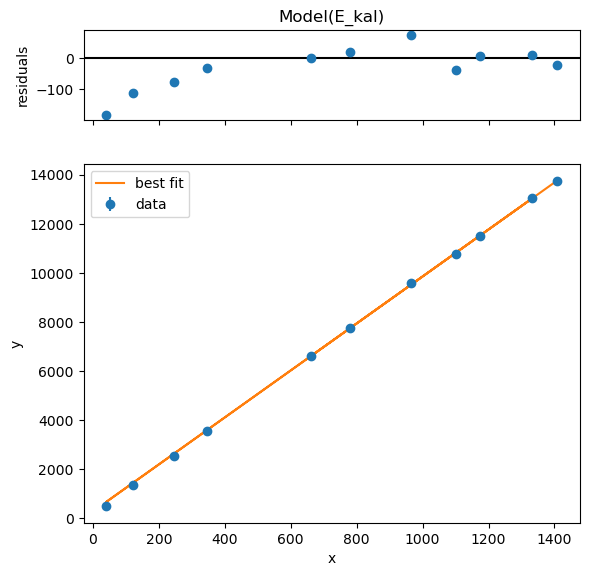

[[Model]]
    Model(E_kal)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 420.355753
    reduced chi-square = 84.0711506
    Akaike info crit   = 32.6663386
    Bayesian info crit = 32.5581589
    R-squared          = 0.99973860
[[Variables]]
    m:  9.56966594 +/- 0.03300017 (0.34%) (init = 9.669315)
    b:  279.213849 +/- 22.9717993 (8.23%) (init = 173.3047)
[[Correlations]] (unreported correlations are < 0.500)
    C(m, b) = -0.9866


In [31]:
Rfit,para,other=Lmfiter(np.array(Elist),np.array(centers),[9.66931466,173.30473054],E_kal,dy=centerser)